# Digits OCR
This notebook is broadly adopted from [this blog](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a) and this [scikit-learn example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-dataset---smaller,-built-in-subset" data-toc-modified-id="Load-the-dataset---smaller,-built-in-subset-1">Load the dataset - smaller, built-in subset</a></span></li><li><span><a href="#Display-sample-data" data-toc-modified-id="Display-sample-data-2">Display sample data</a></span><ul class="toc-item"><li><span><a href="#Split-into-training-and-test" data-toc-modified-id="Split-into-training-and-test-2.1">Split into training and test</a></span></li></ul></li><li><span><a href="#Learning" data-toc-modified-id="Learning-3">Learning</a></span><ul class="toc-item"><li><span><a href="#Viewing-coefficients-as-an-image" data-toc-modified-id="Viewing-coefficients-as-an-image-3.1">Viewing coefficients as an image</a></span></li></ul></li><li><span><a href="#Prediction-and-scoring" data-toc-modified-id="Prediction-and-scoring-4">Prediction and scoring</a></span><ul class="toc-item"><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-4.1">Confusion matrix</a></span></li><li><span><a href="#Inspecting-misclassified-images" data-toc-modified-id="Inspecting-misclassified-images-4.2">Inspecting misclassified images</a></span><ul class="toc-item"><li><span><a href="#Preview-some-images" data-toc-modified-id="Preview-some-images-4.2.1">Preview some images</a></span></li></ul></li><li><span><a href="#Split-into-training-and-test" data-toc-modified-id="Split-into-training-and-test-4.3">Split into training and test</a></span></li><li><span><a href="#Learning" data-toc-modified-id="Learning-4.4">Learning</a></span></li></ul></li></ul></div>

## Load the dataset - smaller, built-in subset

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
type(digits.data)

numpy.ndarray

In [3]:
(digits.data.shape, digits.target.shape, digits.images.shape)

((1797, 64), (1797,), (1797, 8, 8))

`1797` images, each `8x8` in dimension and `1797` labels.

## Display sample data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

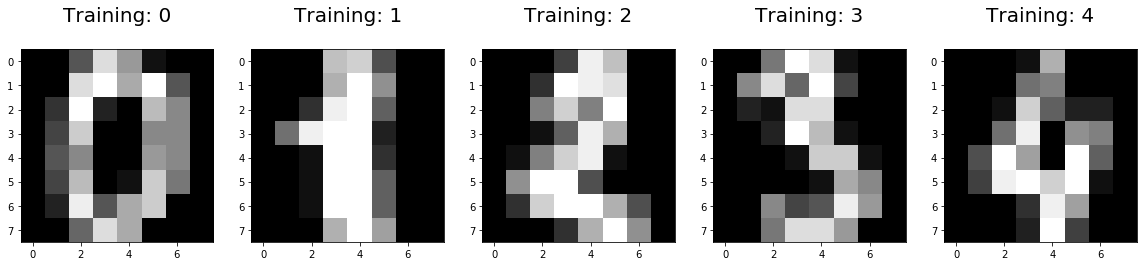

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], 
                                           digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20);

### Split into training and test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target,
                                                   test_size=0.25,
                                                   random_state=0)

In [7]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

## Learning
Refer to the [Logistic reg API ref](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) for these parameters and the [guide](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) for equations, particularly how penalties are applied.

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)
clf

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
%%time
clf.fit(X_train, y_train)

CPU times: user 6.81 s, sys: 9.52 ms, total: 6.81 s
Wall time: 6.82 s


LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Let us see what the classifier has learned

In [10]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
clf.coef_.shape

(10, 64)

In [12]:
clf.coef_[0].round(2) # prints weights for 8x8 image for class 0

array([ 0.  , -0.  , -0.04,  0.1 ,  0.06, -0.14, -0.16, -0.02, -0.  ,
       -0.03, -0.04,  0.2 ,  0.09,  0.08, -0.05, -0.01, -0.  ,  0.06,
        0.15, -0.03, -0.39,  0.25,  0.09, -0.  , -0.  ,  0.13,  0.16,
       -0.18, -0.57,  0.02,  0.12, -0.  ,  0.  ,  0.16,  0.11, -0.16,
       -0.41,  0.05,  0.08,  0.  , -0.  , -0.06,  0.27, -0.11, -0.2 ,
        0.15,  0.04, -0.  , -0.  , -0.12,  0.08, -0.05,  0.2 ,  0.1 ,
       -0.04, -0.01, -0.  , -0.01, -0.09,  0.21, -0.04, -0.06, -0.1 ,
       -0.05])

In [13]:
clf.intercept_ # for 10 classes - this is a One-vs-All classification

array([ 0.0010181 , -0.07236521,  0.00379207,  0.00459855,  0.04585855,
        0.00014299, -0.00442972,  0.01179654,  0.04413398, -0.03454583])

In [14]:
clf.n_iter_[0] # num of iterations before tolerance was reached

1876

### Viewing coefficients as an image
Since there is a coefficient for each pixel in the `8x8` image, we can view them as an image itself. The code below is similar to the original viz code, but runs on coeff.

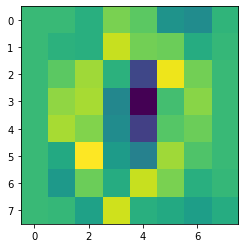

In [16]:
coef = clf.coef_.copy()
plt.imshow(coef[0].reshape(8,8).round(2));  # proof of concept

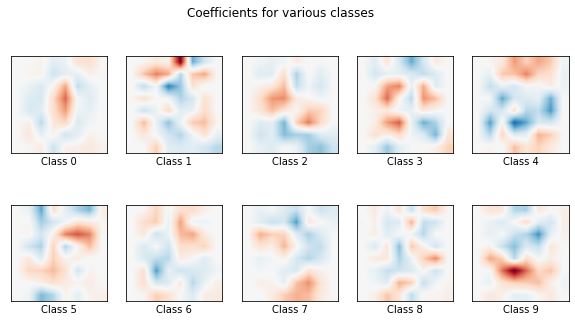

In [17]:
coef = clf.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(10,5))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(8,8), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

## Prediction and scoring

Now predict on unknown dataset and compare with ground truth

In [18]:
print(clf.predict(X_test[0:9]))
print(y_test[0:9])

[2 8 2 6 6 7 1 9 8]
[2 8 2 6 6 7 1 9 8]


Score against training and test data

In [19]:
clf.score(X_train, y_train) # training score

1.0

In [20]:
score = clf.score(X_test, y_test) # test score
score

0.9555555555555556

### Confusion matrix

In [21]:
from sklearn import metrics

In [22]:
predictions = clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 42,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])

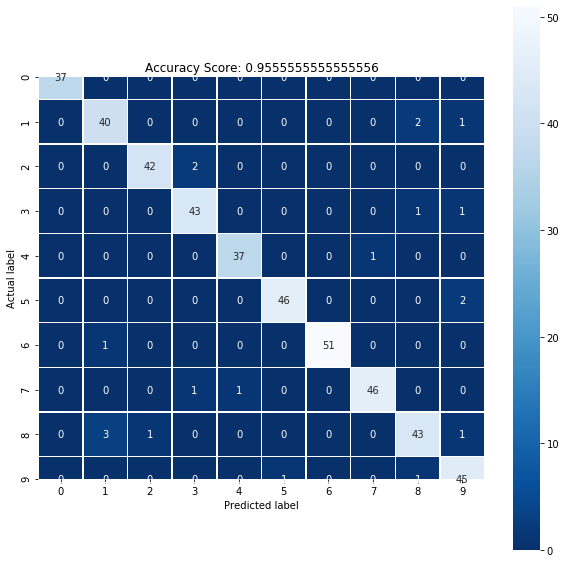

In [23]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);

### Inspecting misclassified images
We compare predictions with labels to find which images are wrongly classified, then display them.

In [24]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassified_images.append(index)
    index +=1

In [25]:
print(misclassified_images)

[56, 94, 118, 124, 130, 169, 181, 196, 213, 251, 315, 325, 331, 335, 378, 398, 425, 429, 430, 440]


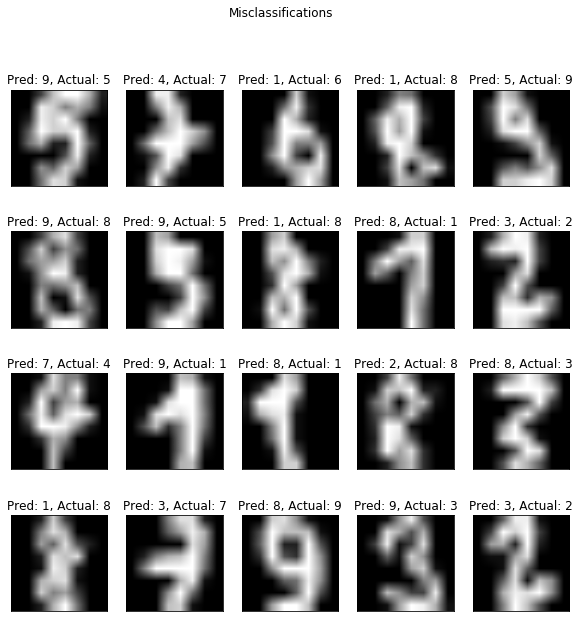

In [26]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    
    p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray,
            interpolation='bilinear')
    p.set_xticks(()); p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred: {predictions[bad_index]}, Actual: {y_test[bad_index]}');

# Predicting on full MNIST database
Downloading for the first time from [open ml db](https://docs.openml.org/) takes me about half a minute. Since this dataset is cached locally, subsequent runs should not take as much.

In [33]:
%%time
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554) # https://www.openml.org/d/554

CPU times: user 15.6 s, sys: 525 ms, total: 16.2 s
Wall time: 27.5 s


In [34]:
type(mnist)

sklearn.utils.Bunch

In [38]:
type(mnist.data), type(mnist.categories), type(mnist.feature_names), type(mnist.target)

(numpy.ndarray, dict, list, numpy.ndarray)

In [40]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

There are `70,000` images, each of dimension `28x28` pixels.

#### Preview some images

In [45]:
mnist.target[0]

'5'

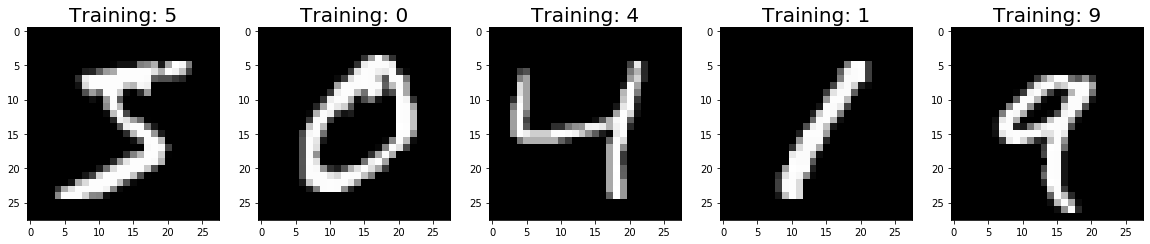

In [46]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], 
                                           mnist.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: ' + label, fontsize = 20);

### Split into training and test

In [50]:
mnist.target.astype('int')

array([5, 0, 4, ..., 4, 5, 6])

In [51]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(mnist.data, 
                                                    mnist.target.astype('int'), #targets str to int convert
                                                   test_size=1/7.0,
                                                   random_state=0)

In [53]:
X2_train.shape, X2_test.shape

((60000, 784), (10000, 784))

### Learning

In [54]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)
clf2

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
%%time
clf.fit(X2_train, y2_train)

Let us see what the classifier has learned

In [10]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
clf.coef_.shape

(10, 64)

In [12]:
clf.coef_[0].round(2) # prints weights for 8x8 image for class 0

array([ 0.  , -0.  , -0.04,  0.1 ,  0.06, -0.14, -0.16, -0.02, -0.  ,
       -0.03, -0.04,  0.2 ,  0.09,  0.08, -0.05, -0.01, -0.  ,  0.06,
        0.15, -0.03, -0.39,  0.25,  0.09, -0.  , -0.  ,  0.13,  0.16,
       -0.18, -0.57,  0.02,  0.12, -0.  ,  0.  ,  0.16,  0.11, -0.16,
       -0.41,  0.05,  0.08,  0.  , -0.  , -0.06,  0.27, -0.11, -0.2 ,
        0.15,  0.04, -0.  , -0.  , -0.12,  0.08, -0.05,  0.2 ,  0.1 ,
       -0.04, -0.01, -0.  , -0.01, -0.09,  0.21, -0.04, -0.06, -0.1 ,
       -0.05])

In [13]:
clf.intercept_ # for 10 classes - this is a One-vs-All classification

array([ 0.0010181 , -0.07236521,  0.00379207,  0.00459855,  0.04585855,
        0.00014299, -0.00442972,  0.01179654,  0.04413398, -0.03454583])

In [14]:
clf.n_iter_[0] # num of iterations before tolerance was reached

1876